# Evaluation Methods for Regression

In this notebook, we'll explore various evaluation metrics for regression models. Evaluating your models accurately is crucial to understanding their performance and making improvements.


For regression tasks, where we predict continuous values, here are some key metrics:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a good model dataset
np.random.seed(42)
X_good = np.random.rand(100, 1) * 10
y_good = 2.5 * X_good + np.random.randn(100, 1) * 2

# Create a bad model dataset
X_bad = np.random.rand(100, 1) * 10
y_bad = 5 + np.random.randn(100, 1) * 10

# Fit the models
model_good = LinearRegression().fit(X_good, y_good)
model_bad = LinearRegression().fit(X_bad, y_bad)

y_pred_good = model_good.predict(X_good)
y_pred_bad = model_bad.predict(X_bad)

# Generate predictions for a random straight line model
np.random.seed(42)
slope_random = np.random.rand() * 5
intercept_random = np.random.rand() * 10
y_pred_random_good = slope_random * X_good + intercept_random
y_pred_random_bad = slope_random * X_bad + intercept_random

# Calculate errors for good model
mae_good = mean_absolute_error(y_good, y_pred_good)
mse_good = mean_squared_error(y_good, y_pred_good)
rmse_good = np.sqrt(mse_good)
r2_good = r2_score(y_good, y_pred_good)

# Calculate errors for bad model
mae_bad = mean_absolute_error(y_bad, y_pred_bad)
mse_bad = mean_squared_error(y_bad, y_pred_bad)
rmse_bad = np.sqrt(mse_bad)
r2_bad = r2_score(y_bad, y_pred_bad)

# Calculate errors for random straight line model (good dataset)
mae_random_good = mean_absolute_error(y_good, y_pred_random_good)
mse_random_good = mean_squared_error(y_good, y_pred_random_good)
rmse_random_good = np.sqrt(mse_random_good)
r2_random_good = r2_score(y_good, y_pred_random_good)

# Calculate errors for random straight line model (bad dataset)
mae_random_bad = mean_absolute_error(y_bad, y_pred_random_bad)
mse_random_bad = mean_squared_error(y_bad, y_pred_random_bad)
rmse_random_bad = np.sqrt(mse_random_bad)
r2_random_bad = r2_score(y_bad, y_pred_random_bad)

### Plotting the Results
We'll plot the results with dotted vertical red lines between the data samples and the prediction line.

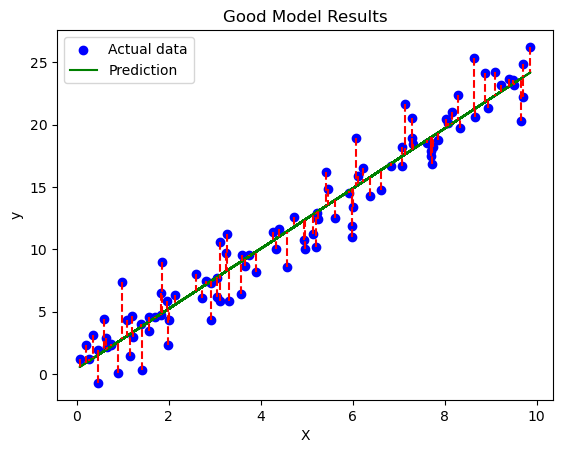

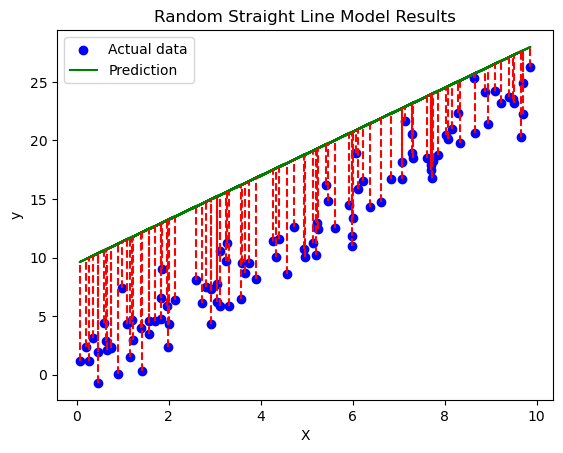

In [14]:
# Plotting the Results
def plot_results(X, y, y_pred, title):
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='green', label='Prediction')
    for i in range(len(X)):
        plt.plot([X[i], X[i]], [y[i], y_pred[i]], 'r--')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Plotting good model results
plot_results(X_good, y_good, y_pred_good, 'Good Model Results')

# Plotting random straight line model results (good dataset)
plot_results(X_good, y_good, y_pred_random_good, 'Random Straight Line Model Results')


In [21]:
print("Good Model Errors:")
print(f"MAE: {mae_good}, MSE: {mse_good}, RMSE: {rmse_good}, R-squared: {r2_good}")

print("\nRandom Straight Line Model Errors (Good Dataset):")
print(f"MAE: {mae_random_good}, MSE: {mse_random_good}, RMSE: {rmse_random_good}, R-squared: {r2_random_good}")

Good Model Errors:
MAE: 1.4020853439275516, MSE: 3.226338255868214, RMSE: 1.7962010622055131, R-squared: 0.9402877892004072

Random Straight Line Model Errors (Good Dataset):
MAE: 6.559862775209432, MSE: 48.769129897171666, RMSE: 6.9834898079092, R-squared: 0.0973939078966839


### Mean Absolute Error (MAE)
MAE is the average of the absolute differences between predicted and actual values.

#### Equation
$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

#### Intuition
MAE represents the average error between the predicted values and the actual values. It is easy to interpret because it gives the error in the same units as the target variable.

#### Reason for Construction
MAE is constructed to give a straightforward measure of prediction error. By taking the absolute value of the errors, it avoids the problem of positive and negative errors canceling each other out.

In [1]:
from sklearn.metrics import mean_absolute_error

# Example usage
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae}')

MAE: 0.5


### Mean Squared Error (MSE)
MSE calculates the average of the squared differences between predicted and actual values. 

#### Equation
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

#### Intuition
MSE emphasizes larger errors more than smaller ones by squaring the differences. This makes it useful when large errors are particularly undesirable.

#### Reason for Construction
The squaring of errors ensures that negative errors do not cancel out positive errors and penalizes larger errors more, reflecting their higher impact on model performance.

In [3]:
from sklearn.metrics import mean_squared_error

# Example usage
mse = mean_squared_error(y_true, y_pred)
print(f'MSE: {mse}')

MSE: 0.375


### Root Mean Squared Error (RMSE)
RMSE is the square root of MSE, bringing the error back to the original units of the target variable.

#### Equation
$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

#### Intuition
RMSE provides an error metric that is more interpretable because it is in the same units as the target variable. Like MSE, it penalizes larger errors more heavily.

#### Reason for Construction
Taking the square root of MSE brings the error measure back to the same scale as the original data, making it easier to interpret in practical terms.

In [4]:
# Example usage
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 0.6123724356957945


### R-squared (Coefficient of Determination)
R-squared explains the proportion of variance in the dependent variable that is predictable from the independent variables.

#### Equation
$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

#### Intuition
R-squared indicates how well the model's predictions match the actual data. An $R^2$ of 1 indicates perfect predictions, while an $R^2$ of 0 indicates that the model does no better than the mean of the target variable.

#### Reason for Construction
R-squared is constructed to provide a normalized measure of goodness-of-fit that accounts for the variance in the data. It compares the model's errors to the variance of the target variable.

In [10]:
from sklearn.metrics import r2_score

# Example usage
r2 = r2_score(y_true, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9486081370449679


In [11]:
r2_score(y_true, y_true)

1.0

## Conclusion
Evaluating your models using the right metrics is essential for understanding their performance and making improvements. Experiment with these metrics to see which ones work best for your specific tasks.

That's it for today's notebook! If you have any questions, feel free to reach out. Happy coding!